In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from RLC.real_chess import tree, agent
# import endgame_agent as agent
import randnoise_learn as learn
from randnoise_environment import Board
from chess.pgn import Game

# these are FENS, which are a concise way of representing the board states
# 10 common end games were selected for training purposes
endgame_fens = [
    # King, queen, and three pawns vs king, queen, and three pawns
    "4k3/1p2pp2/8/8/8/8/1P2PP2/4K3 w - - 0 1",
    # King, rook, knight, bishop, and pawn vs king, rook, knight, bishop, and pawn
    "4k3/1prnbp2/8/8/8/8/1PRNBP2/4K3 w - - 0 1",
    # King, two bishops and three pawns vs king, two knights and three pawns
    "4k3/1p1bpp2/8/8/8/8/1P1NNP2/4K3 w - - 0 1",
    # King, two rooks and three pawns vs king, two rooks and three pawns
    "4k3/1p1rrp2/8/8/8/8/1P1RRP2/4K3 w - - 0 1",
    # King, queen, knight, bishop and pawn vs king, queen, knight, bishop and pawn
    "4k3/1pqnbP2/8/8/8/8/1PQNBp2/4K3 w - - 0 1",
    # King, queen, two bishops and pawn vs king, queen, two bishops and pawn
    "4k3/1pqbbP2/8/8/8/8/1PQBBp2/4K3 w - - 0 1",
    # King, queen, two knights and pawn vs king, queen, two knights and pawn
    "4k3/1pqnNP2/8/8/8/8/1PQnnp2/4K3 w - - 0 1",
    # King, queen, rook, bishop, and pawn vs king, queen, rook, bishop, and pawn
    "4k3/1pqrBP2/8/8/8/8/1PQRbp2/4K3 w - - 0 1",
    # King, queen, rook, knight, and pawn vs king, queen, rook, knight, and pawn
    "4k3/1pqrNP2/8/8/8/8/1PQRnp2/4K3 w - - 0 1",
    # King, rook, two knights and pawn vs king, rook, two knights and pawn
    "4k3/1prnNP2/8/8/8/8/1PRNnp2/4K3 w - - 0 1"
]

opponent = agent.GreedyAgent()
env = Board(opponent, FEN=None, endgame_fens=endgame_fens)
player = agent.Agent(lr=0.0005,network='big')
learner = learn.TD_search(env, player,gamma=0.8,search_time=2)
node = tree.Node(learner.env.board, gamma=learner.gamma)
player.model.summary()

Using TensorFlow backend.
C:\Users\there\Anaconda3\envs\neuro140\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\there\Anaconda3\envs\neuro140\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\there\Anaconda3\envs\neuro140\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\there\Anaconda3\envs\neuro140





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state (InputLayer)              (None, 8, 8, 8)      0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 8, 4)      36          state[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 8)      264         state[0][0]                      
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 3, 3, 12)     876         state[0][0]                      
__________________________________________________________________________________________________
conv2d

Skip below if you have a model already in mind

In [3]:
# learner.learn(iters=1000000, timelimit_seconds=3600)

In [4]:
# learner.agent.model.save('')

Start here if you have a model in mind

In [3]:
from tensorflow.keras.models import load_model

learner.agent.model = load_model('RLC_model_test.h5')
learner.agent.fixed_model = load_model('RLC_model_test.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
learner.env.reset()
learner.search_time = 100
learner.temperature = 1/3

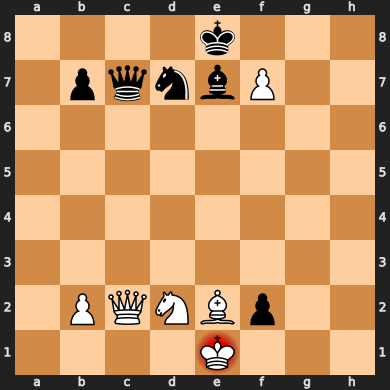

In [5]:
learner.env.board

Current FEN: 4k3/1pqnbP2/8/8/8/8/1PQNBp2/4K3 w - - 0 1
Post-noise FEN: 5k2/1pqnbP2/8/8/8/8/1PQNBp2/4K3 w - - 0 1
Current FEN: 5k2/1pqnbP2/8/8/8/8/1PQNBp2/5K2 b - - 1 1
Post-noise FEN: 5k2/1pqnbP2/8/8/8/8/1PQNBp2/5K2 b - - 1 1
Current FEN: 5k2/1p1nbP2/8/8/8/8/1PqNBp2/5K2 w - - 0 2
Post-noise FEN: 5k2/3nbP2/p7/8/8/8/1PqNBp2/5K2 w - - 0 2
Current FEN: 5k2/3nbP2/p7/8/8/8/1PqNBK2/8 b - - 0 2
Post-noise FEN: 5k2/3nbP2/p7/8/8/8/1PqNBK2/8 b - - 0 2
Current FEN: 5k2/3nbP2/p7/8/8/8/1P1qBK2/8 w - - 0 3
Post-noise FEN: 5k2/3nbP2/p7/8/8/8/1P1qBK2/8 w - - 0 3
Current FEN: 5k2/3nbP2/p7/8/1P6/8/3qBK2/8 b - - 0 3
Post-noise FEN: 6k1/3nbP2/p7/8/1P6/8/3qBK2/8 b - - 0 3
Current FEN: 8/3nbk2/p7/8/1P6/8/3qBK2/8 w - - 0 4
Post-noise FEN: 8/3nbk2/1p6/8/1P6/8/3qBK2/8 w - - 0 4
Current FEN: 8/3nbk2/1p6/8/1P6/5K2/3qB3/8 b - - 1 4
Post-noise FEN: 8/3n1k2/1p2b3/8/1P6/5K2/3qB3/8 b - - 1 4
Current FEN: 8/3n1k2/1p2b3/8/1P6/5K2/4q3/8 w - - 0 5
Post-noise FEN: 8/3n1k2/1p2b3/8/1P6/5K2/8/3q4 w - - 0 5
Current FEN: 8/3n1k

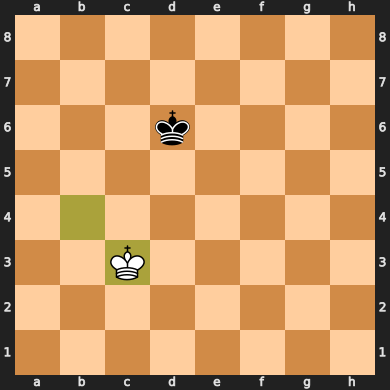

In [6]:
from randnoise_environment import Board

learner.play_game(10000, maxiter=200)

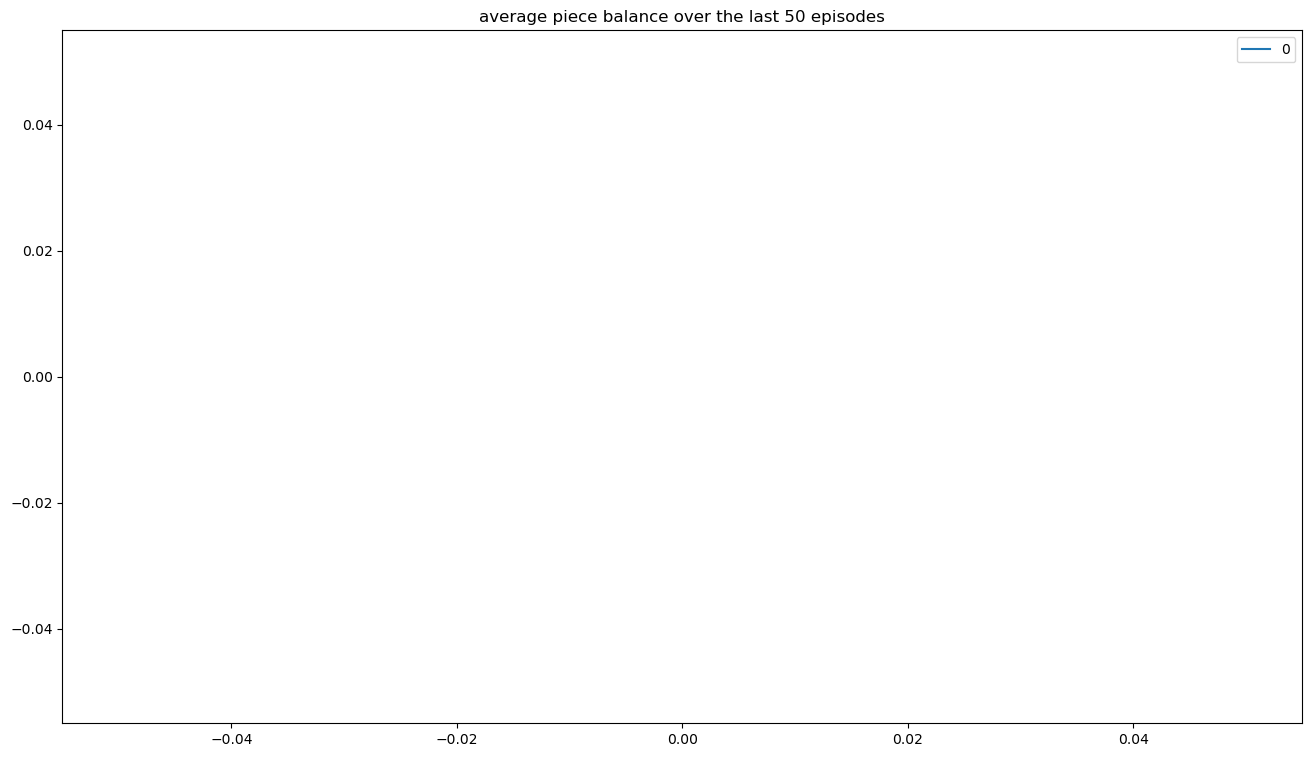

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

reward_smooth = pd.DataFrame(learner.piece_balance_trace)
reward_smooth.rolling(window=100,min_periods=0).mean().plot(figsize=(16,9),title='average piece balance over the last 50 episodes')
plt.show()

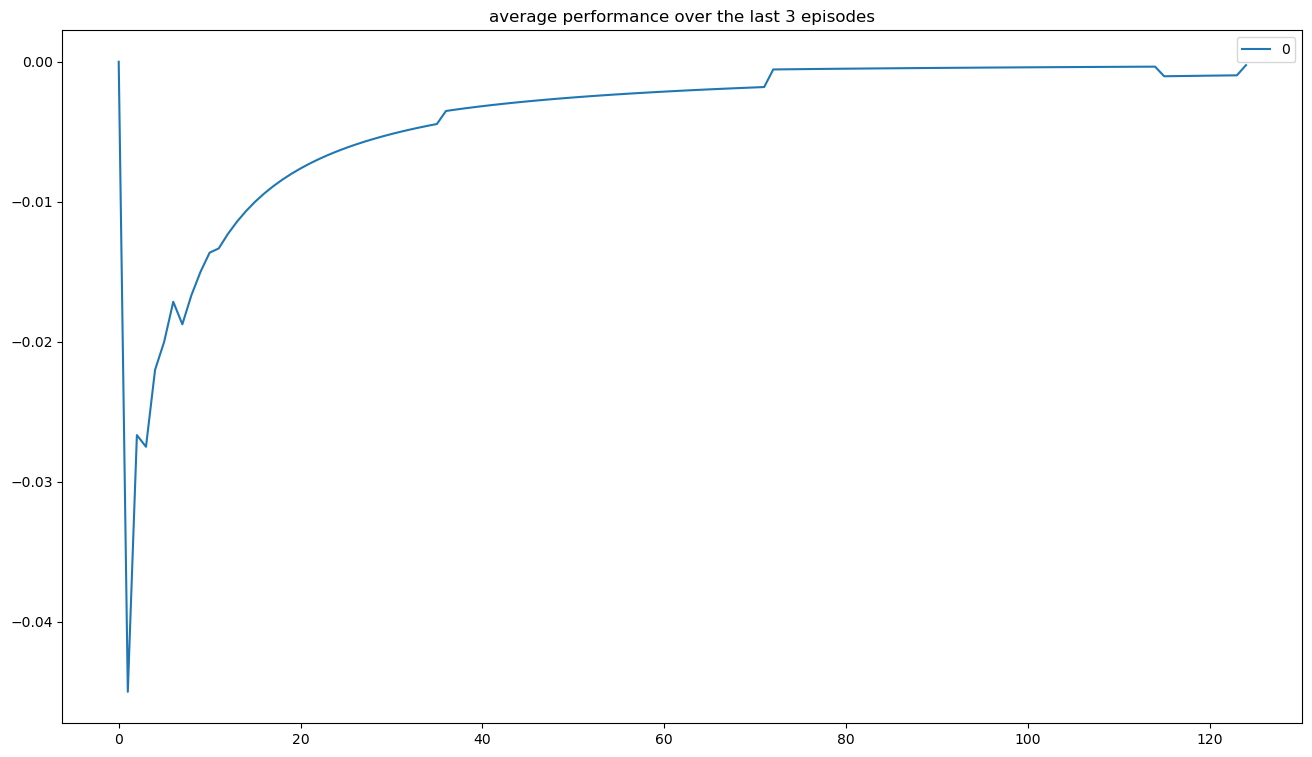

In [8]:
reward_smooth = pd.DataFrame(learner.reward_trace)
reward_smooth.rolling(window=500,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 3 episodes')
plt.show()

In [9]:
pgn = Game.from_board(learner.env.board)
with open("rlc_pgn_randnoise5", "w") as log:
    log.write(str(pgn))